In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style, simple_norm
plt.style.use(astropy_mpl_style)

from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from photutils import aperture_photometry, find_peaks
from photutils.aperture import CircularAperture, CircularAnnulus

In [3]:
path = "/home/jeje/Dokumente/Masterthesis/ZirkumstellareScheibe_HD142527/"

In [4]:
image_data = fits.getdata(path + "sci_cyc153_normft_1.fits", ext=0)
fits.info(path + "sci_cyc153_normft_1.fits")

Filename: /home/jeje/Dokumente/Masterthesis/ZirkumstellareScheibe_HD142527/sci_cyc153_normft_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     831   (1024, 1024, 4)   float32   


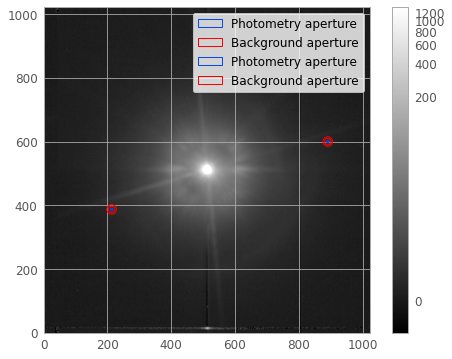

[(891.0, 600.0)]
5.8804855
[(213.0, 387.0)]
4.6814137


In [5]:
int1 = image_data[0,:,:]

norm = simple_norm(int1, 'log', percent=99.9)
plt.imshow(int1, cmap='gray', norm= norm)
#plt.imshow(int1, cmap='gray', vmin=0, vmax=200)
positions_gh_1 = [(891.0, 600.0)] 
apertures_gh_1 = CircularAperture(positions_gh_1, r=4.)
annulus_gh_1 = CircularAnnulus(positions_gh_1, r_in=10, r_out=15)
apertures_gh_1.plot(color ='#0547f9', lw=1.0, label='Photometry aperture')
annulus_gh_1.plot(color = 'red', lw=1.0, label='Background aperture')

positions_gh_2 = [(213.0, 387.0)] 
apertures_gh_2 = CircularAperture(positions_gh_2, r=4.)
annulus_gh_2 = CircularAnnulus(positions_gh_2, r_in=10, r_out=15)
apertures_gh_2.plot(color ='#0547f9', lw=1.0, label='Photometry aperture')
annulus_gh_2.plot(color = 'red', lw=1.0, label='Background aperture')

plt.xlim(0, int1.shape[1]-1)
plt.ylim(0, int1.shape[0]-1)
plt.legend()
plt.colorbar()

plt.show()

phot_table_gh_1 = aperture_photometry(int1, apertures_gh_1)
aperture_gh_1 = np.array(phot_table_gh_1['aperture_sum'])
print(positions_gh_1)
print(int1[600, 891])

phot_table_gh_2 = aperture_photometry(int1, apertures_gh_2)
aperture_gh_2 = np.array(phot_table_gh_2['aperture_sum'])
print(positions_gh_2)
print(int1[387, 213])

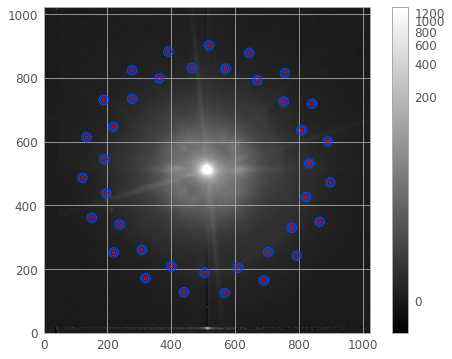

In [18]:
# We want to create an aperture and an annulus for several points on a circle around the star at the same radius 
# where the ghost is

## Find the position of the star
tbl = find_peaks(int1, 500, box_size=50)
pe = np.array(tbl['peak_value'])
pe_x = np.array(tbl['x_peak'])
pe_y = np.array(tbl['y_peak'])
peaks = np.array((pe_x, pe_y, pe)).T
peaks = peaks.tolist()
peaks = sorted(peaks, key=lambda t: t[2], reverse=True)
star_position = [(peaks[0][0], peaks[0][1])] 

plt.imshow(int1, cmap='gray', norm = norm)

## Positions of the ghosts in Polar coordinates, where the star is the origin
rad_1 = np.sqrt((positions_gh_1[0][0]-star_position[0][0])**2 + (positions_gh_1[0][1]-star_position[0][1])**2)
phi_gh_1 = np.arctan((positions_gh_1[0][1]-star_position[0][1])/(positions_gh_1[0][0]-star_position[0][0]))

rad_2 = np.sqrt((positions_gh_2[0][0]-star_position[0][0])**2 + (positions_gh_2[0][1]-star_position[0][1])**2)
phi_gh_2 = np.arctan((positions_gh_2[0][1]-star_position[0][1])/(positions_gh_2[0][0]-star_position[0][0]))

circ_1 = CircularAperture(star_position, r=round(rad_1, 0))
circ_2 = CircularAperture(star_position, r=round(rad_2, 0))

phi_1 = np.linspace(0, 2*np.pi, 20) + phi_gh_1
x_circ_1 = star_position[0][0] + rad_1* np.cos(phi_1)
y_circ_1 = star_position[0][1] + rad_1* np.sin(phi_1)
circ_positions_1 = []
for i in range(len(x_circ_1)-1):
    circ_positions_1.append((x_circ_1[i],y_circ_1[i]))

circles_1 = CircularAperture(circ_positions_1, r=4.)
circles_1.plot(color ='r', lw=1.0)
annulus_circles_1 = CircularAnnulus(circ_positions_1, r_in=10, r_out=15)
annulus_circles_1.plot(color ='#0547f9', lw=1.0)

phi_2 = np.linspace(0, 2*np.pi, 20) + phi_gh_2
x_circ_2 = star_position[0][0] + rad_2* np.cos(phi_2)
y_circ_2 = star_position[0][1] + rad_2* np.sin(phi_2)
circ_positions_2 = []
for i in range(len(x_circ_2)-1):
    circ_positions_2.append((x_circ_2[i],y_circ_2[i]))

circles_2 = CircularAperture(circ_positions_2, r=4.)
circles_2.plot(color ='r', lw=1.0)
annulus_circles_2 = CircularAnnulus(circ_positions_2, r_in=10, r_out=15)
annulus_circles_2.plot(color ='#0547f9', lw=1.0)

#circ_1.plot(color ='y', lw=1.0)
#circ_2.plot(color ='y', lw=1.0)
plt.xlim(0, int1.shape[1]-1)
#plt.xlim(850, 950)
plt.ylim(0, int1.shape[0]-1)
#plt.ylim(550, 650)
#plt.legend()
plt.colorbar()

#plt.savefig('Aperture_photometry.pdf')
plt.show()

In [20]:
phot_table_circ_1 = aperture_photometry(int1, circles_1)
aperture_circ_1 = np.array(phot_table_circ_1['aperture_sum'])
print(aperture_circ_1)

phot_table_circ_2 = aperture_photometry(int1, circles_2)
aperture_circ_2 = np.array(phot_table_circ_2['aperture_sum'])
print(aperture_circ_2)

[220.4287895   31.82219343  31.26610662  29.06245894  45.39250838
  33.84623935  42.09253291  44.57080126  36.40278739  35.96015485
  30.79560243  27.02430356  26.19502087  29.34365243  37.39586808
  35.88844238  39.98496542  42.41041888  50.47192127]
[62.78808724 55.97904945 53.63208768 57.14882109 67.77033416 56.38384677
 63.0137234  63.50794542 79.2373018  68.01361399 59.60744352 58.40440757
 50.7195301  47.35177543 86.67491762 88.07465409 94.90802477 98.70270361
 89.17267387]


Schreibe verschiedene ghosts in loop!!!!!